# Final Project Submission

* Student name: Heath Rittler
* Student pace: Self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@heathlikethecandybar/

# Introduction

## Business Case/ Summary

SyriaTel, a telecommunications company wants to identify the leading factors of why a customer cancels their service.  This is also referred to as 'Churn.'  If they understand the factors that lead to churn, the company can implement programs to reduce the risk of churn, and increase the lifetime value of and for their customers.

My goal is to build a classifer to predict whether a customer will stop doing business with SyriaTel using information such as usage, interactions with SyriaTel, and certain features that the customer has purchased.  I am mostly focused on reducing the rate of false negatives.

## Core Field Names and Definitions from Data Source

https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

* `state`- The state in which the account owner resides.
* `account length` - 
* `area code` - Primary 3 digit area of the line for the account.
* `phone number` - Primary 7 digit area of the line for the account.
* `international plan` - Indicator denoting whether or not the account has an international feature.
* `voice mail plan` - Indicator denoting whether or not the account has an voice mail feature.
* `number vmail messages` - Usage metric counting the total number of voicemails for the phone number in question.
* `total day minutes` - Usage metric indicating how many minutes (call time) were used between 6:00am and 5:00pm.
* `total day calls` - Usage metric indicating how many calls were used between 6:00am and 5:00pm. 
* `total day charge` - Usage metric indicating how much the user was charged for their usage between 6:00am and 5:00pm.
* `total eve minutes` - Usage metric indicating how many minutes (call time) were used between 5:01pm and 8:00pm.
* `total eve calls` - Usage metric indicating how many calls were used between 5:01pm and 8:00pm. 
* `total eve charge` - Usage metric indicating how much the user was charged for their usage between 5:01pm and 8:00pm.
* `total night minutes` - Usage metric indicating how many minutes (call time) were used between 8:01pm and 5:59am.
* `total night calls` - Usage metric indicating how many calls were used between 8:01pm and 5:59am.
* `total night charge` - Usage metric indicating how much the user was charged for their usage between 8:01pm and 5:59a.
* `total intl minutes` - Usage metric indicating how many minutes (call time) were used internationally.
* `total intl calls` - Usage metric indicating how many calls were made internationally.
* `total intl charge` - Usage metric indicating how much the user was charged for their international call usage.
* `customer service calls` - The total number of customer service calls made by the user to the Skyvia Customer Service line.
* `churn` - Our target category indicating whether or not the customer churned/ cancelled their plan.

# Data Load, Cleaning

## Importing Packages

In [286]:
# Importing packages for analysis

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

import xgboost

lr = LinearRegression()
plt.style.use('seaborn-talk')
import sklearn.metrics as metrics


%matplotlib inline

## Choosing Colors & Templates

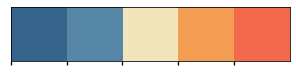

In [473]:
# Choosing standard colors for project

pal = ['#37648C',
        '#5687A6',
        '#F2E4BB',
        '#F29D52',
        '#F26A4B']

color_codes = ['darkblue', 'blue', 'beige', 'orange', 'redorange']

c = lambda x: pal[color_codes.index(x)]

sns.palplot(sns.color_palette(pal))

div = []

## Import data

In [288]:
# Importing data and viewing the first 5 rows

df = pd.read_csv('data/data.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [289]:
# Updating column names to have an _ vs a space

df.columns = [c.replace(' ', '_') for c in df.columns]

In [290]:
# Taking a quick peak at our datatypes for any transformations needed.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Looks like we have a few categorical variables in which we will need to encode.  Well look at that here in a bit.  First I want to make sure our dataset is complete. Moving on to checking to see if we need to remove or impute any data before any transformations.

In [291]:
# Checking for missing values.

df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

No missing values. Going to create some columns to add together all of our minutes, calls, and charges.  We might be able to reduce the number of dimensions we have if the customer is not using the plan at all.  We may drop these later, but let's add them while we are in the mood.

In [292]:
# Adding column for total calls

df['total_calls'] = (df['total_day_calls'] +
                    df['total_eve_calls'] + 
                    df['total_night_calls'] + 
                    df['total_intl_calls']
                    )

In [293]:
# Adding column for total minutes

df['total_charges'] = (df['total_day_charge'] + 
                    df['total_eve_charge'] + 
                    df['total_night_charge'] + 
                    df['total_intl_charge']
                      )

In [294]:
# Adding column for total charges

df['total_minutes'] = (df['total_day_minutes'] + 
                    df['total_eve_minutes'] + 
                    df['total_night_minutes'] + 
                    df['total_intl_minutes']
                      )

In [295]:
df['price_per_minute'] = df['total_day_charge']/df['total_minutes']

In [296]:
# Quick check to make sure our columns were added correctly and math checks out

df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_charges,total_minutes,price_per_minute
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,False,303,75.56,717.2,0.062842
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,False,332,59.24,625.2,0.043938
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,False,333,62.29,539.4,0.076715
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,False,255,66.80,564.8,0.090120
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,False,359,52.09,512.0,0.055352


Going to look at some summary statistics of the dataset based on where we are at.

In [297]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_calls,total_charges,total_minutes,price_per_minute
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,305.137114,59.449754,591.864776,0.051355
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,34.448164,10.502261,89.954251,0.013085
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,191.000000,22.930000,284.300000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,282.000000,52.380000,531.500000,0.042939
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,305.000000,59.470000,593.600000,0.051557
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,328.000000,66.480000,652.400000,0.060121
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,416.000000,96.150000,885.000000,0.096748


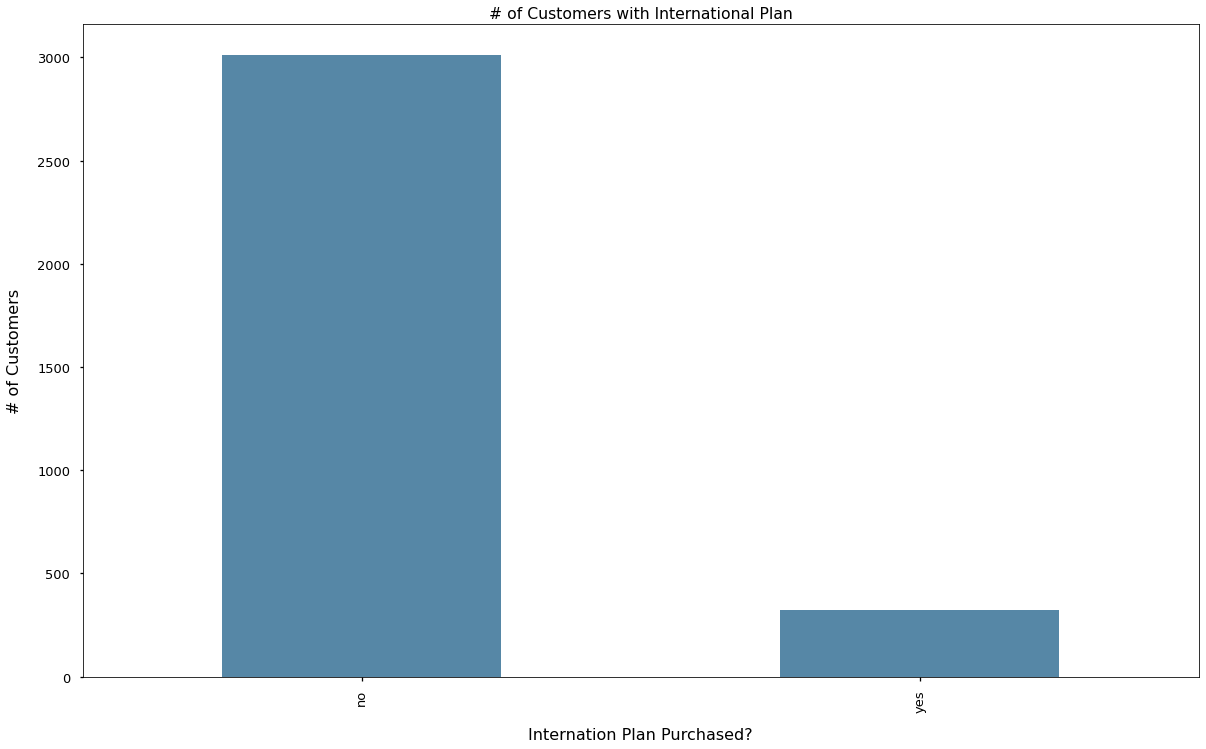

In [298]:
fix, ax = plt.subplots(figsize=(20,12))

df['international_plan'].value_counts().plot(kind='bar', color=c('blue'))

ax.set_title('# of Customers with International Plan')
ax.set_xlabel('Internation Plan Purchased?', labelpad=15, fontsize=16)
ax.set_ylabel('# of Customers', labelpad=15, fontsize=16)

plt.show()

There are 323 accounts that purchased a international plan (roughly 10% of customers.). Going to take a look to see if churn within the international accounts is similar to those accounts that did not purchase international plans.

In [299]:
# Checking our target/ dataset for balance before creating our baseline classifcation model.

pd.pivot_table(df, 
               values='account_length', 
               index='international_plan', 
               columns='churn',
               aggfunc='count'
              )

churn,False,True
international_plan,,
no,2664,346
yes,186,137


International plans experience a higher churn percentage than those without.  Going to remove those international plans as it is a small percentage of my overall records (roughly 10%).  We can always come back to these if necessary.  Going to also look at voice mail plans.  However, according to this, about 1/3 of the churn that was experienced were customers that had purchased the international plan.


In [300]:
# Creating pivot table for voice mail plan vs churn.

pd.pivot_table(df, 
               values='account_length', 
               index='voice_mail_plan', 
               columns='churn',
               aggfunc='count'
              )

churn,False,True
voice_mail_plan,,
no,2008,403
yes,842,80


Looks like those plans with a voice mail plan have a lower churn percentage than those without. 10% of those with the voice mail plan vs 20% of those without a voice mail plan churn.  We will keep this in mind as we complete our analyses.  We could always remove later.


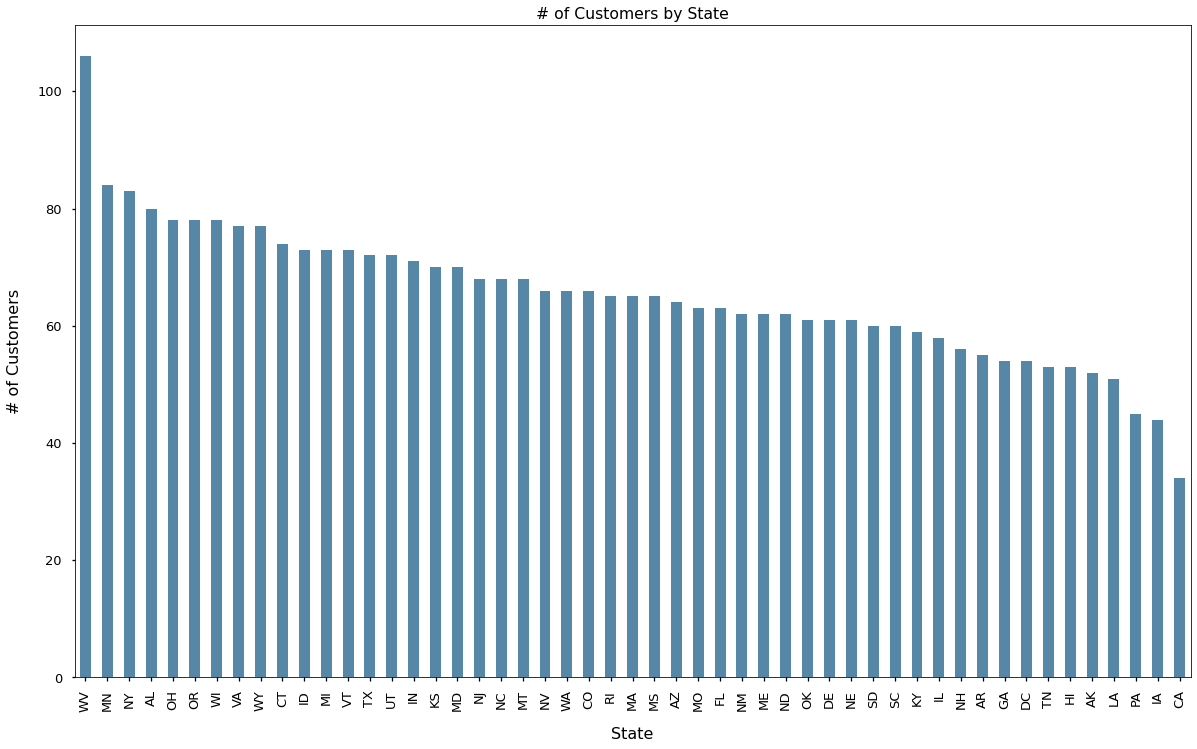

In [301]:
fix, ax = plt.subplots(figsize=(20,12))

df['state'].value_counts().plot(kind='bar', color=c('blue'))

ax.set_title('# of Customers by State')
ax.set_xlabel('State', labelpad=15, fontsize=16)
ax.set_ylabel('# of Customers', labelpad= 15, fontsize=16)

plt.show()

Overall the distribution of states is pretty good!  No concerns here, however we will need to encode this categorical column if we want to retain this information.

In [302]:
# Since we are thinking about dropping our state column, we still have area_code, and our phone_number_prefix,
# to give us an idea of where the users are located.  Going to split those columns out from the line_number,
# which won't really help us.

df[['phone_number_prefix','line_number']] = df.phone_number.str.split("-",expand=True,).astype(int)
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_charges,total_minutes,price_per_minute,phone_number_prefix,line_number
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,3,2.70,1,False,303,75.56,717.2,0.062842,382,4657
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,3,3.70,1,False,332,59.24,625.2,0.043938,371,7191
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,5,3.29,0,False,333,62.29,539.4,0.076715,358,1921
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,7,1.78,2,False,255,66.80,564.8,0.090120,375,9999
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,3,2.73,3,False,359,52.09,512.0,0.055352,330,6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,6,2.67,2,False,292,60.10,660.7,0.040185,414,4276
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,4,2.59,3,False,239,63.53,585.4,0.067117,370,3271
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,6,3.81,2,False,264,67.74,675.6,0.045500,328,8230
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,10,1.35,2,False,336,57.53,517.6,0.070228,364,6381


In [437]:
# dropping state, and phone number

df = df.drop(['phone_number', 
              'line_number',
              'state'
             ], 
             axis=1
            )

KeyError: "['phone_number' 'line_number'] not found in axis"

In [438]:
# Going back to look at our columns that need transformed from string to integer // international plan

df = df.replace({'international_plan': 
                 {'yes': 1, 
                  'no': 0
                 }
                }
               )

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [439]:
# Going back to look at our columns that need transformed from string to integer // voice mail plan

df = df.replace({'voice_mail_plan': 
                 {'yes': 1, 
                  'no': 0
                 }
                }
               )

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [440]:
# Going back to look at our columns that need transformed from string to integer // voice mail plan

df['churn'] = df['churn'].astype(int)

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

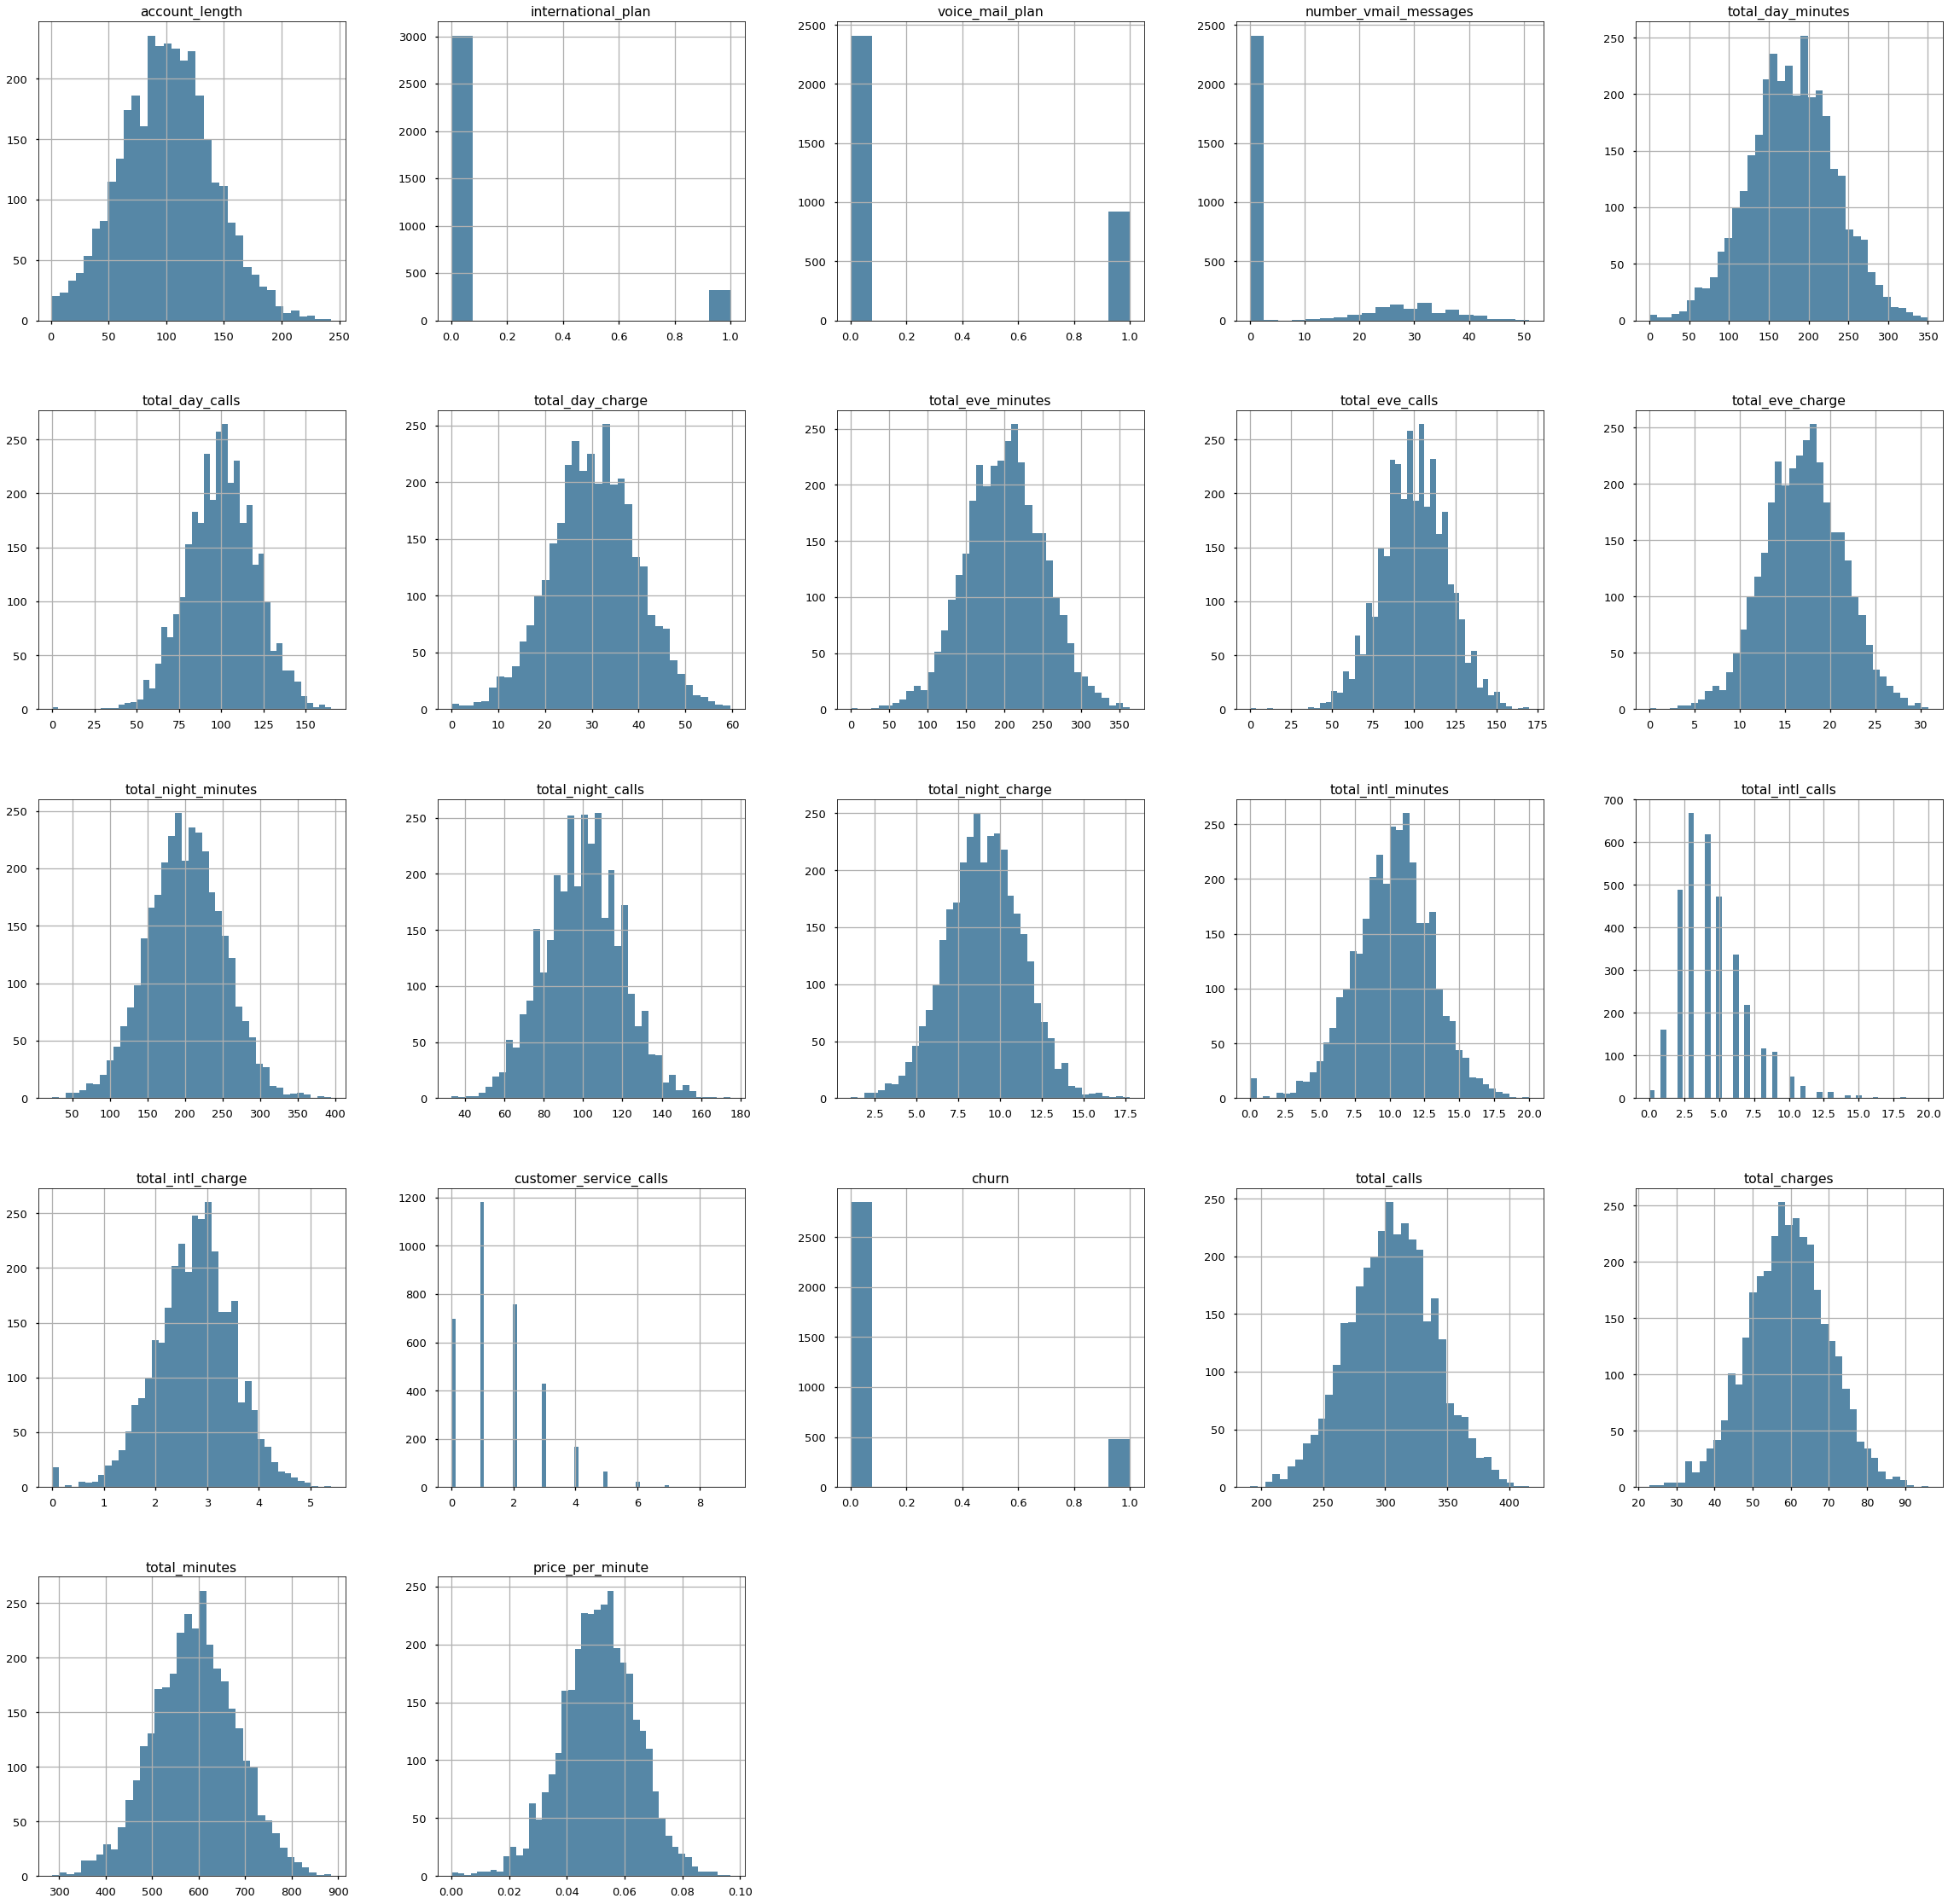

In [442]:
# Going to look at overall distribution and histograms to visually inspect our data

df.hist(bins='auto', 
        figsize=(40,40),
        color=c('blue')
       );

In [443]:
# Before summarizing the table above, I am going to take a peek at the area code column vs the prefix columns.

df['area_code'].value_counts()


pd.pivot_table(df, 
               values='account_length', 
               index='area_code', 
               columns='phone_number_prefix',
               aggfunc='count'
              )

phone_number_prefix,"0 382\n1 371\n2 358\n3 375\n4 330\n ... \n3328 414\n3329 370\n3330 328\n3331 364\n3332 400\nName: phone_number_prefix, Length: 3333, dtype: int64"
area_code,
"0 415\n1 415\n2 415\n3 408\n4 415\n ... \n3328 415\n3329 415\n3330 510\n3331 510\n3332 415\nName: area_code, Length: 3333, dtype: int64",3333


The histograms above show a pretty good distribution of values across the board.  We only have 3 area codes for the all the prefixes that we see.  We may want to encode this category since it is categorical feature.  I will also encode the phone number prefix, and the state columns before running any models.  Going to continue to review.

In [444]:
# Updating international and voicemail indicators to boolean, and area code and phone_num prefix to strings

df['area_code'] = str(df['area_code'])
df['phone_number_prefix'] = str(df['phone_number_prefix'])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

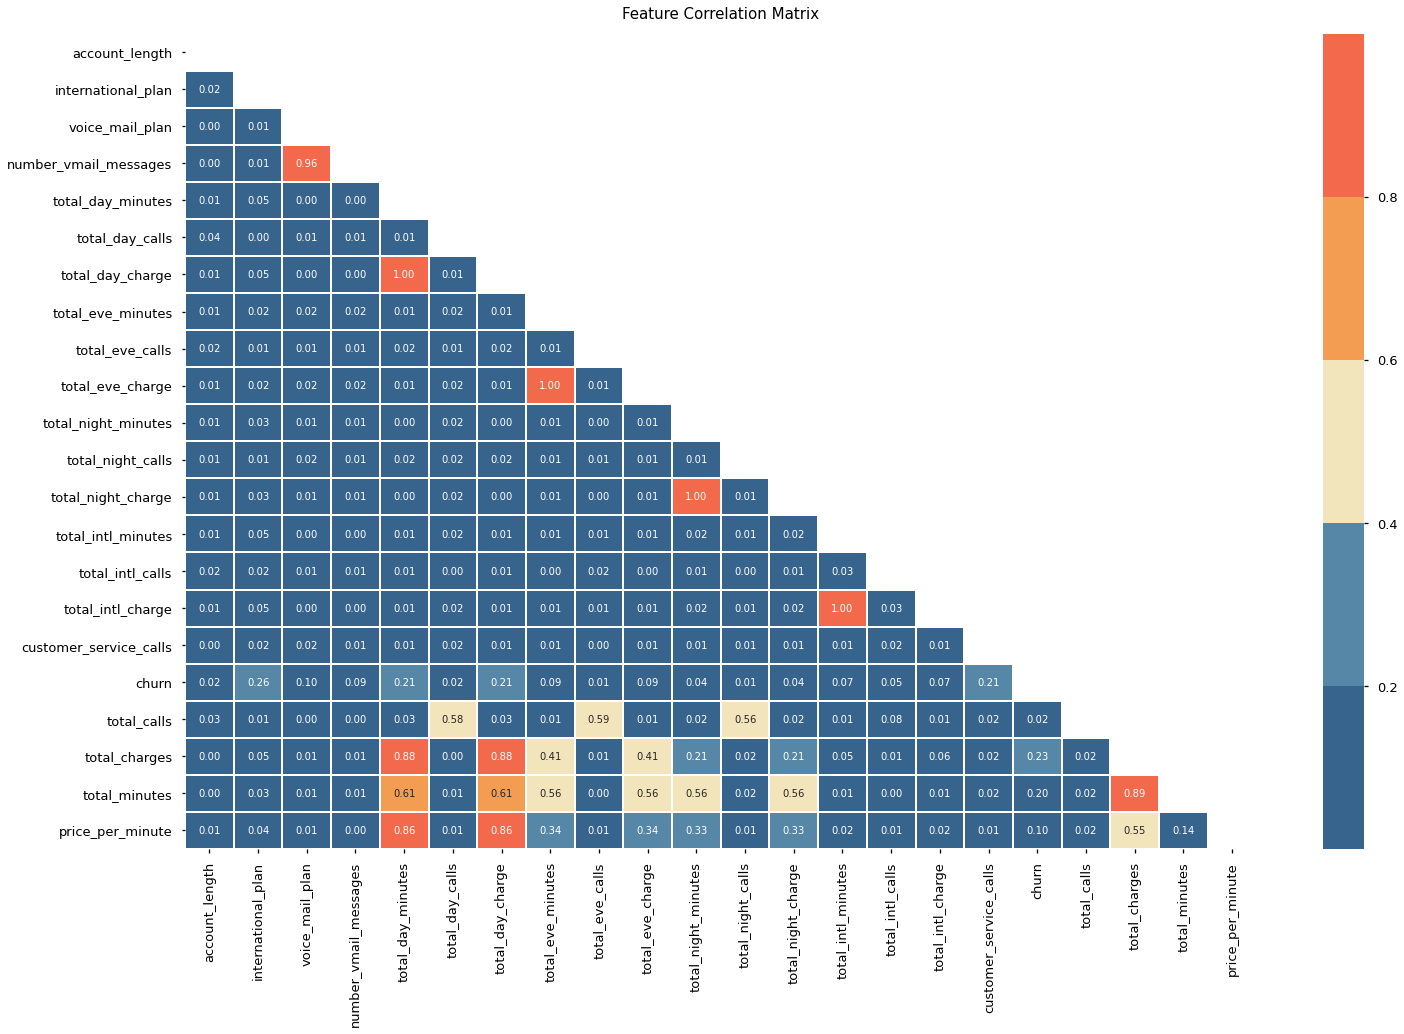

In [445]:
# Creating a heatmap to look at colinearity and potential categories that will lead to churn prediction.

corr = df.corr().abs()

fix, ax = plt.subplots(figsize = (24,15))
matrix = np.triu(corr)
ax.set_title('Feature Correlation Matrix', pad=15, fontsize=15)
heatmap = sns.heatmap(corr, annot=True, cmap=pal, fmt='.2f', mask=matrix, linewidths=1)
plt.show()

Charges and total minutes are perfectly correlated, which makes sense.  I wonder if the price per minute is the same for all customers, or if it is different.  Also the number of voicemail messages, and the voice mail plan category are also highly correlated.  Meaning if they purchased the plan, it is highly likely that they used it.  Day minutes were highly correlated with the total minutes vs evening minutes.  It looks like churn had the highest correlation with the international plan (which we identified as a possibility earlier).  Total day minutes, total day charges, and customer service calls.  Customer service calls could be related to the actual service that the customer experienced, or could be the fact that the customer had to call in to cancel their plan, thus driving that columns correlation higher.

In [446]:
# Checking our target/ dataset for balance before creating our baseline classifcation model.

print('Raw Counts')
print(df['churn'].value_counts())
print()
print('Percentages')
print(df['churn'].value_counts(normalize=True))

Raw Counts
0    2850
1     483
Name: churn, dtype: int64

Percentages
0    0.855086
1    0.144914
Name: churn, dtype: float64


A baseline model that always chose the majority class would have an accuracy of over 88%. Therefore we will want to report additional metrics at the end.

# Baseline Logistic Regression Model

In [447]:
# Quick look at our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [448]:
# situate target and non-target features
X = df.drop('churn', axis=1)
y = df['churn']

# create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [449]:
# Also looking at a dummy model with 5 cross validation folds.  Mean accuracy is about
# 86%.  This aligns with our assumption above with the imbalance of our churned 
# customer count.

dummy_model = DummyClassifier(strategy='most_frequent')

cv_results = cross_val_score(dummy_model, 
                             X_train, 
                             y_train, 
                             cv=5)

dummy_model.fit(X_train, y_train)

np.mean(cv_results)

0.8567430861723446

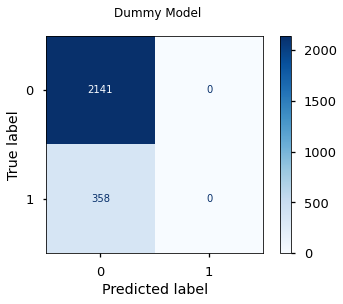

In [450]:
# Visualize dummy model confusion matrix

fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, 
                      X_train, 
                      y_train, 
                      ax=ax,
                      cmap='Blues'
                     );

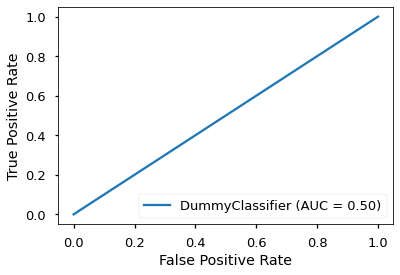

In [451]:
# Hallmark curve for dummy model

plot_roc_curve(dummy_model, X_train, y_train);

In [452]:
# Looking for similar values for target distribution roughly 85/15.

print("Train percent churn:", y_train.value_counts(normalize=True)[1])
print("Test percent churn: ", y_test.value_counts(normalize=True)[1])

Train percent churn: 0.14325730292116848
Test percent churn:  0.1498800959232614


## Pipeline & Logistic Regression Model

In [454]:
# Labeling columns for different preprocessing steps

categorical_columns = ['area_code', 'phone_number_prefix']

numerical_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
            'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
            'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
            'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'total_calls', 'total_charges',
            'total_minutes', 'price_per_minute'
           ]

binary_columns = ['international_plan', 'voice_mail_plan']

In [455]:
# Check to make sure we have all our columns accounted for

(len(categorical_columns)+len(numerical_columns)+len(binary_columns)) == (df.shape[1]-1)

False

In [456]:
# Create subsets of the dataset representing binary, numerical and categorical data 
# to be able to preprocess them differently for modeling. \
X_train_binary = X_train[binary_columns]
X_train_nums = X_train[numerical_columns]
X_train_cats = X_train[categorical_columns]

In [457]:
binary_preprocessing = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='most_frequent'))
])

numerical_preprocessing = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_preprocessing = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(drop='first', sparse=False))
])

#grab columns out of a pandas data frame and then apply a specified transformer.
preprocessor = ColumnTransformer(transformers=[
    ('binary_preprocess', binary_preprocessing, X_train_binary.columns),
    ('num_preprocess', numerical_preprocessing, X_train_nums.columns),
    ('cat_preprocess', categorical_preprocessing, X_train_cats.columns)]
)

In [458]:
# Baseline Logistic Regression model 
baseline_logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", LogisticRegression(random_state=42))
])
    
# Train model
baseline_logreg.fit(X_train, y_train);

In [459]:
# Display the train data frame after preprocessing:
cat_feature_names = preprocessor.named_transformers_['cat_preprocess'].named_steps['ohe'].get_feature_names(X_train_cats.columns)
feature_names = np.r_[X_train_binary.columns, X_train_nums.columns, cat_feature_names]

X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train), columns= feature_names)
X_train_transformed

,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_calls,total_charges,total_minutes,price_per_minute
0,0.0,0.0,-1.404508,-0.584700,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,...,0.004940,1.071757,2.768109,-0.595235,2.767357,-0.427903,0.969919,-0.798317,0.143574,-2.273379
1,0.0,0.0,0.366388,-0.584700,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,...,0.670832,2.212569,1.051970,-1.417963,1.045965,0.324616,0.824133,1.035986,1.761137,-0.541475
2,0.0,1.0,0.518179,1.685101,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,...,-0.763398,-0.077797,-0.056369,0.227493,-0.053077,1.829653,-1.012762,0.951385,0.645500,0.817341
3,0.0,0.0,2.010792,-0.584700,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,...,-0.660953,-0.322569,-0.056369,-0.183871,-0.053077,-0.427903,0.969919,-0.841579,-0.823386,-0.342801
4,0.0,0.0,0.290493,-0.584700,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,...,0.056162,-1.188013,0.837453,1.050221,0.834102,1.077134,0.561720,-0.070556,-0.761903,1.193432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0.0,0.0,0.138701,-0.584700,1.746540,0.980114,1.746707,-0.044882,-0.894137,-0.045169,...,-1.941515,-0.781516,-1.522237,-0.595235,-1.522881,-0.427903,-1.100233,1.241720,0.537066,1.654014
2495,0.0,0.0,0.543478,-0.584700,-2.681141,-1.926002,-2.680873,-0.396533,-0.545355,-0.396122,...,-2.146405,1.001822,0.873206,-1.006599,0.873826,-0.427903,-2.733029,-2.248070,-1.247060,-3.009721
2496,0.0,0.0,-0.873239,-0.584700,-1.709753,-1.224526,-1.710027,1.207625,0.550818,1.207571,...,1.285502,-0.313827,-0.378145,0.227493,-0.384114,-0.427903,0.357620,-1.107879,-0.540564,-1.855434
2497,0.0,0.0,1.732508,-0.584700,-0.014911,0.529165,-0.015400,-0.507164,1.497512,-0.507683,...,-0.404840,0.551617,-0.127875,0.638857,-0.132526,0.324616,0.999076,-0.111895,0.012783,-0.006857


Text(0.5, 1.0, 'Confusion Matrix - Test')

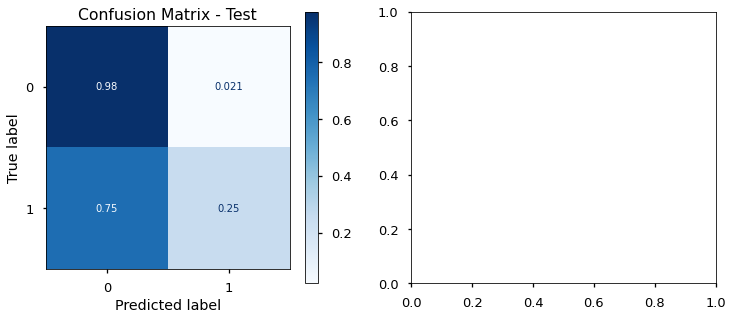

In [460]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


#plot confusion matrix on 
plot_confusion_matrix(baseline_logreg, X_test, y_test, normalize='true', ax=ax1,  cmap='Blues') 
ax1.set_title("Confusion Matrix - Test")



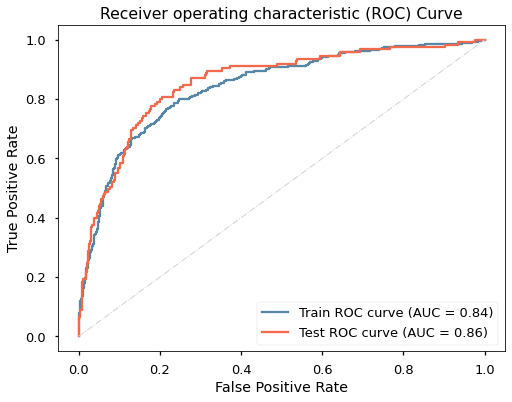

In [461]:
fig, ax2 = plt.subplots(figsize=(8, 6))
plot_roc_curve(baseline_logreg, X_train, y_train, ax=ax2, name ='Train ROC curve', color=c("blue"))
plot_roc_curve(baseline_logreg, X_test, y_test, ax=ax2, name ='Test ROC curve', color=c("redorange") )
ax2.plot([0, 1], [0, 1], color='lightgray', lw=1, linestyle='-.')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic (ROC) Curve')
plt.show();


In [462]:
# Print classification Scores for the test set
y_true = y_test
y_pred = baseline_logreg.predict(X_test)
divider = ('-' * 60) 
table_title = 'Classification Report - Test:'
table = classification_report(y_true, y_pred, digits=3)
print('\n', divider, table_title, divider, table, divider, divider, '\n' , sep='\n') 



------------------------------------------------------------
Classification Report - Test:
------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.881     0.979     0.927       709
           1      0.674     0.248     0.363       125

    accuracy                          0.869       834
   macro avg      0.777     0.613     0.645       834
weighted avg      0.850     0.869     0.843       834

------------------------------------------------------------
------------------------------------------------------------




In [463]:
# Print roc_auc for test and train 
roc_score_train_cv = cross_val_score(estimator=baseline_logreg, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='roc_auc').mean()
roc_score_train = roc_auc_score(y_train, baseline_logreg.predict_proba(X_train)[:, 1]) 
roc_score_test = roc_auc_score(y_test, baseline_logreg.predict_proba(X_test)[:, 1])
        
        # Find Sensitivity and Specificity Scores:
recall_score_train = recall_score(y_train, baseline_logreg.predict(X_train))
recall_score_test = recall_score(y_test, baseline_logreg.predict(X_test))
        
tn, fp, fn, tp = confusion_matrix(y_train, baseline_logreg.predict(X_train)).ravel()
specificity_score_train = tn / (tn+fp) 
        
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, baseline_logreg.predict(X_test)).ravel()
specificity_score_test = tn1 / (tn1+fp1) 
        
        # Print accuracy for test and train 
acc_score_train = accuracy_score(y_train, baseline_logreg.predict(X_train)) 
acc_score_test = accuracy_score(y_test, baseline_logreg.predict(X_test))
        
print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
print('\n', divider, divider, '\n' , sep='\n')
        
print(f" Train Accuracy Score: {acc_score_train :.2%}")  
print(f" Test Accuracy Score: {acc_score_test :.2%}")    
print('\n', divider, divider, '\n' , sep='\n')
        
print(f" Train Recall score: {recall_score_train :.2%}")    
print(f" Test Recall score: {recall_score_test :.2%}")  
print('\n', divider, divider, '\n' , sep='\n')
        
print(f" Train Precision score: {specificity_score_train :.2%}")    
print(f" Test Precision Score: {specificity_score_test :.2%}")   
print('\n', divider, divider, '\n' , sep='\n')

 Mean Cross Validated Roc_Auc Score: 83.23%
 Train Roc_Auc Score: 84.11%
 Test Roc_Auc Score: 85.67%


------------------------------------------------------------
------------------------------------------------------------


 Train Accuracy Score: 87.23%
 Test Accuracy Score: 86.93%


------------------------------------------------------------
------------------------------------------------------------


 Train Recall score: 25.98%
 Test Recall score: 24.80%


------------------------------------------------------------
------------------------------------------------------------


 Train Precision score: 97.48%
 Test Precision Score: 97.88%


------------------------------------------------------------
------------------------------------------------------------




In [464]:
# There should be two underscores between estimator name and it's parameters in a Pipeline

parameters = {
    'estimator__penalty' : ['l1','l2'], # default = l2 elasticnet is both
    'estimator__fit_intercept':[True, False],
    'estimator__C'       : [0.001,0.01,0.1,0.5,1,10,100], #np.logspace(-3,3,7) # default=1.0
    'estimator__solver'  : ['newton-cg', 'lbfgs', 'liblinear'], # default = ’lbfgs’
    'estimator__max_iter'  : [50,100,200,300]  # default = 100
}
      
# Create the grid, with "logreg_pipeline" as the estimator
best_logreg = GridSearchCV(estimator = baseline_logreg,   # model
                          param_grid = parameters,        # hyperparameters
                          scoring ='roc_auc',             # metric for scoring
                          cv = 5,                         # number of folds for cross-validation
                          n_jobs = -1                     # 1 job per core of the computer.
)                      



In [465]:
# Train the pipeline (tranformations & predictor)
best_logreg.fit(X_train, y_train);
best_logreg.best_params_

{'estimator__C': 10,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 100,
 'estimator__penalty': 'l2',
 'estimator__solver': 'lbfgs'}

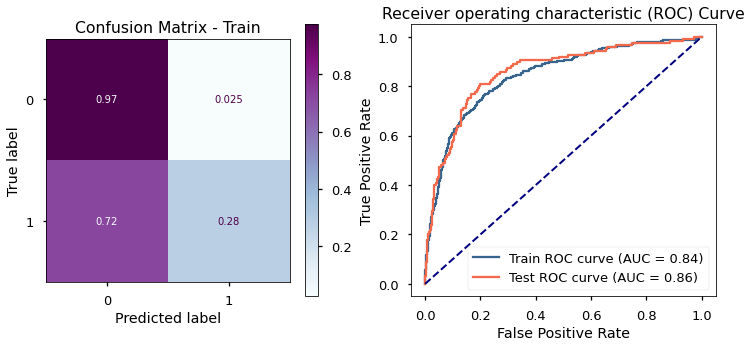

In [466]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plot_confusion_matrix(best_logreg.best_estimator_, X_test, y_test, normalize = 'true', ax=ax1,  cmap='BuPu') 
ax1.grid(False) 
ax1.set_title("Confusion Matrix - Train")

plot_roc_curve(best_logreg.best_estimator_, X_train, y_train, ax=ax2, name ='Train ROC curve', color=c("darkblue"))
plot_roc_curve(best_logreg.best_estimator_, X_test, y_test, ax=ax2, name ='Test ROC curve', color=c("redorange") )
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic (ROC) Curve')
plt.show();

In [467]:
# Display the test data frame after preprocessing:
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test), columns= feature_names)
X_test_transformed

,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_calls,total_charges,total_minutes,price_per_minute
0,0.0,0.0,0.315791,-0.584700,-0.462675,-0.372733,-0.462730,2.562862,0.301688,2.562574,...,1.183057,-0.222038,1.159229,-0.595235,1.165138,-0.427903,0.590877,0.687007,1.081470,-1.017237
1,0.0,0.0,-0.847941,-0.584700,-1.311946,0.829797,-1.311676,0.326524,1.198556,0.326702,...,2.105062,-0.239521,0.908959,0.638857,0.913550,-1.180421,2.427772,-1.009819,-0.716070,-1.257750
2,0.0,0.0,-0.063687,-0.584700,-3.330584,-5.032539,-3.330643,-0.815352,1.497512,-0.814476,...,-0.609730,-0.659130,-1.236214,-1.417963,-1.231568,1.829653,-2.499772,-3.513239,-2.886980,-3.968384
3,0.0,0.0,1.175941,-0.584700,0.606778,-1.074209,0.607160,0.063774,-0.445702,0.064068,...,0.670832,-0.873306,-0.020616,-1.006599,-0.026594,-0.427903,-0.575406,0.368792,-0.094533,0.814510
4,0.0,0.0,-0.114284,-0.584700,-0.666204,0.078216,-0.666259,0.470740,-1.342571,0.470802,...,-0.456063,0.534133,-0.092122,1.050221,-0.092802,-0.427903,-0.925291,-0.283020,0.163696,-0.855476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0.0,0.0,1.783105,-0.584700,-0.786471,0.479059,-0.785982,-0.054760,0.451166,-0.054466,...,1.592837,1.810444,1.087723,0.227493,1.085690,0.324616,1.465589,-0.239758,0.557188,-1.158462
830,0.0,0.0,-0.291373,-0.584700,-1.807817,-1.174420,-1.807982,-0.665209,-0.993789,-0.665728,...,-1.531735,-0.117135,-1.093203,-0.183871,-1.099154,-0.427903,-2.149887,-1.977923,-1.569007,-1.578536
831,0.0,1.0,-0.569657,0.952907,-0.359060,-0.773577,-0.359332,0.439131,-1.043615,0.438263,...,-0.404840,-1.507090,-0.270886,-1.417963,-0.264941,0.324616,-1.391804,-0.486831,-0.833447,0.101840
832,0.0,1.0,1.024150,2.270856,-1.167625,1.330852,-1.168008,1.494082,-0.595181,1.493446,...,1.285502,1.757993,0.730194,-1.006599,0.728170,-1.180421,1.086547,0.025581,1.160839,-1.765699


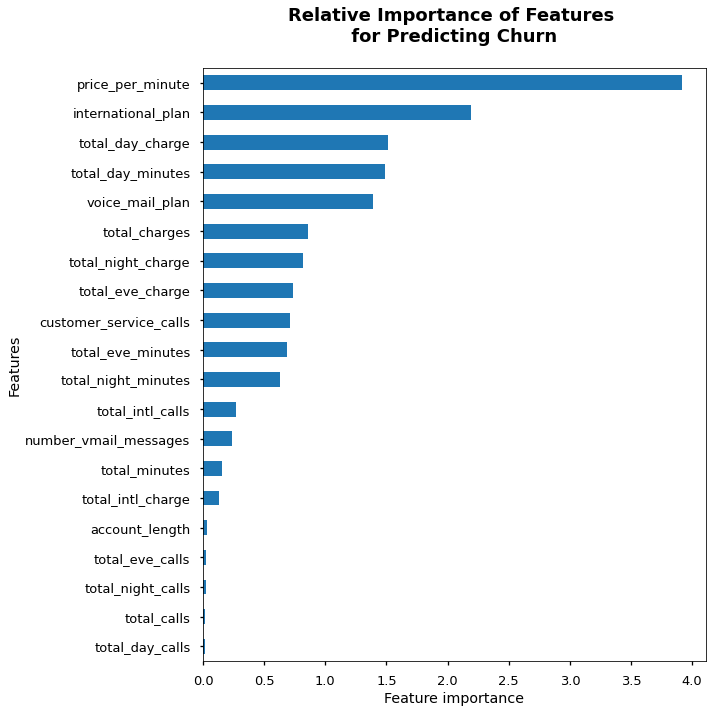

In [476]:
# estimator = name of the estimator in the pipeline
# Create a function to visualize feature importance using Logistic Regression

coeffs = best_logreg.best_estimator_.named_steps['estimator'].coef_ 
importance = pd.Series(abs(coeffs[0]), index=feature_names) # logreg_coeffs[0] = getting the one-dim list inside the list
    
fig, ax = plt.subplots(figsize=(10,10))
importance.sort_values().tail(20).plot.barh(ax=ax);        
ax.set_title("Relative Importance of Features \n for Predicting Churn \n", fontsize=18, fontweight='bold') 
ax.set_xlabel('Feature importance')
ax.set_ylabel('Features')
fig.tight_layout()

# Build KNN Model

In [112]:
# import class
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Relevant imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Perform cross-validation
knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

knn_baseline_log_loss

1.038909487455165

In [114]:
# Your code here (add more cells as needed)
# Adjusting the neighbors value to see if we are overfitting with the default = 5.
knn_second_model = KNeighborsClassifier(n_neighbors=25)

knn_second_log_loss = -cross_val_score(knn_second_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_second_log_loss

0.4244979271230056

In [115]:
# Your code here (add more cells as needed)
# Changing from Euclidean difference to manhattan difference
knn_3_model = KNeighborsClassifier(n_neighbors=25, metric="manhattan")

knn_3_log_loss = -cross_val_score(knn_3_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_3_log_loss

0.41417928373727547

In [116]:
# Adjusting the number of neighbors once again to see if we can increase performance.
knn_4_model = KNeighborsClassifier(n_neighbors=40, metric="manhattan")

knn_4_log_loss = -cross_val_score(knn_4_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_4_log_loss

0.3266754422380838

In [117]:
# Backtracking to see what increased neighbors looks like with Euclidean distance.
knn_5_model = KNeighborsClassifier(n_neighbors=40)

knn_5_log_loss = -cross_val_score(knn_5_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_5_log_loss

0.33791503480549256

In [118]:
# Backtracking to see what increased neighbors looks like with Euclidean distance.
knn_6_model = KNeighborsClassifier(n_neighbors=15)

knn_6_log_loss = -cross_val_score(knn_6_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_6_log_loss

0.5662196185569204

# Build Decision Tree Model

In [59]:
# Baseline model 
baseline_tree = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", DecisionTreeClassifier(random_state=42))
])

# Train model
baseline_tree.fit(X_train, y_train);

In [60]:
baseline_tree.score(X_train, y_train)

1.0

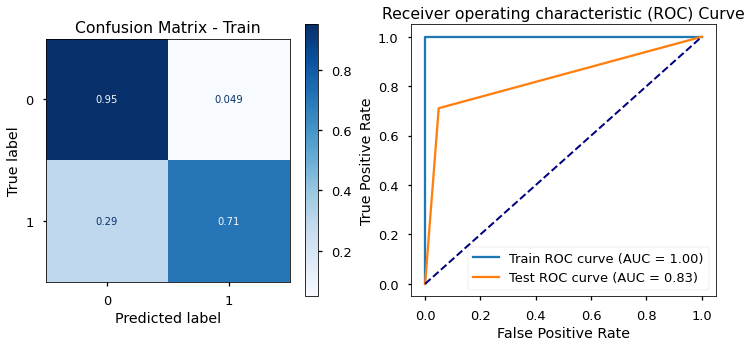



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.951     0.951     0.951       713
           1      0.711     0.711     0.711       121

    accuracy                          0.916       834
   macro avg      0.831     0.831     0.831       834
weighted avg      0.916     0.916     0.916       834

--------------------------------------------------------
--------------------------------------------------------


 Mean Cross Validated Roc_Auc Score: 85.81%
 Train Roc_Auc Score: 100.00%
 Test Roc_Auc Score: 83.08%


--------------------------------------------------------
--------------------------------------------------------


 Train Accuracy Score: 100.00%
 Test Accuracy Score: 91.61%


--------------------------------------------------------
--------------------------------------------------------


 Train Sensit

In [61]:
model_evaluation_roc_auc(baseline_tree)

In [477]:
# There should be two underscores between estimator name and it's parameters in a Pipeline

parameters = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 2, 3, 4, 5, 6],
    'estimator__max_features': [None, 15,  5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
      
# Create the grid, with "logreg_pipeline" as the estimator
best_tree = GridSearchCV(estimator = baseline_tree,    # model
                          param_grid = parameters,     # hyperparameters
                          scoring ='roc_auc',          # metric for scoring
                          cv = 5,                      # number of folds for cross-validation
                          n_jobs = -1                  # 1 job per core of the computer.
)                      



In [478]:
# Train the pipeline (tranformations & predictor)
best_tree.fit(X_train, y_train);
best_tree.best_params_

{'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 15,
 'estimator__min_samples_leaf': 6,
 'estimator__min_samples_split': 2}

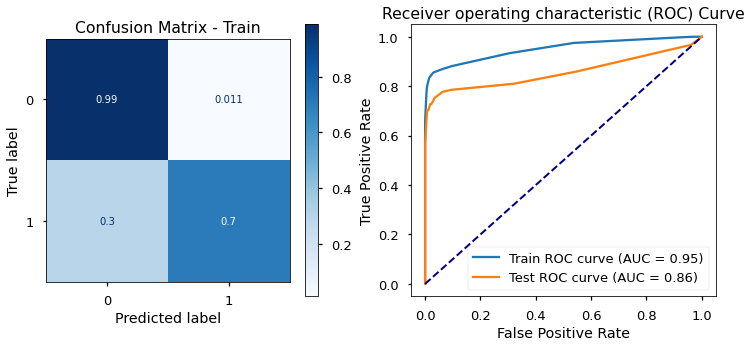



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.951     0.989     0.970       713
           1      0.914     0.702     0.794       121

    accuracy                          0.947       834
   macro avg      0.933     0.846     0.882       834
weighted avg      0.946     0.947     0.944       834

--------------------------------------------------------
--------------------------------------------------------


 Mean Cross Validated Roc_Auc Score: 90.15%
 Train Roc_Auc Score: 95.04%
 Test Roc_Auc Score: 85.65%


--------------------------------------------------------
--------------------------------------------------------


 Train Accuracy Score: 96.48%
 Test Accuracy Score: 94.72%


--------------------------------------------------------
--------------------------------------------------------


 Train Sensitiv

In [70]:
model_evaluation_roc_auc(best_tree.best_estimator_)

# Random Forest

## Baseline Forest

In [ ]:
base_RF = Pipeline([("preprocessor", preprocessor), 
                    ('estimator', RandomForestClassifier(random_state=42)
                    )
                   ])

# Train model
base_RF.fit(X_train, 
            y_train);

## Tuned Forest

In [ ]:
parameters = {
    'estimator__n_estimators': [150],                  # default=100 Number of trees. , Higher values prevent overfitting 
    'estimator__criterion': ['entropy', 'gini'],       # default = gini
    'estimator__max_depth': [6, 7, 8],                 # default = None, Lower depth prevents overfitting
    'estimator__max_features': [None, 5, 10, 15],      # default = None (n_features), Lower values prevent overfitting  
    'estimator__min_samples_split': [10, 20, 50],      # default = 2, Higher values prevent overfitting 
    'estimator__min_samples_leaf': [2, 4, 6]           # default = 1, Higher values prevent overfitting 
}     
        
best_RF = GridSearchCV(estimator = baseline_RF,   
                        param_grid = parameters,     
                        scoring ='roc_auc',          
                        cv = 5,
                        n_jobs = -1)                      

best_RF.fit(X_train, y_train);

# Build Another Model (XGBoost, other?)

In [ ]:
baseline_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ('estimator', XGBClassifier(objective="binary:logistic", random_state=42))
])

# Train model
baseline_xgb.fit(X_train, y_btrain);

In [ ]:
parameters = {
    "estimator__n_estimators": [75],              # default = 100, To avoid overfitting use "fewer" trees unlike RF.
    "estimator__learning_rate": [0.05, 0.1, 0.2], # default = 0.3, Lower ratios avoid over-fitting. If you reduce the learning rate in your XGBoost model, your model will also be less likely to overfit. 
    "estimator__max_depth": [4, 5, 6],            # default = 6, It is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    'estimator__gamma': [0.5, 1],                 # default = 0 , Larger values avoid over-fitting.
    'estimator__min_child_weight': [3, 4, 5],     # default = 1, Larger values avoid over-fitting. The larger min_child_weight is, the more conservative the algorithm will be. 
    'estimator__subsample': [0.5, 0.75],          # default = 1, Lower ratios avoid over-fitting.
    'estimator__colsample_bytree':[0.5, 0.75]     # default = 1, Lower ratios avoid over-fitting.
}

best_xgb = GridSearchCV(estimator = baseline_xgb,       
                        param_grid = parameters,     
                        scoring ='roc_auc',          
                        cv = 5,
                        n_jobs = -1
)                      

# Train the pipeline (tranformations & predictor)ui0
best_xgb.fit(X_train, y_train);

# Model Evalution

# Final Model